# Data Wrangling

In this notebook, I will load the data and perform data wrangling techniques to clean data and deal with missing values 

**Table of Contents**

[Loading modules and Data](#Reading-File)  
* [Reading File](#Reading-File)
* [Set Index Column](#Set-Index-Column)
* [Renaming Columns](#Renaming-Columns)
* [Visualizing Missing Values](#Visualizing-Missing-Values)
 

[Cleaning Data](#Cleaning-Data)  
* [Numerical Variables](#Numerical-Variables)
* [Categorical Variables](#Categorical-Variables)
* [Outliers](#Outliers)

[Summary](#Summary)  


<a id=’Loading-Modules-and-data’></a>
## Loading Modules and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno 
%matplotlib inline

<a id=’About-the-Raw-Data’></a>
### About the Raw Data

The dataset is acquired through Kaggle https://www.kaggle.com/ruiqurm/lianjia. It includes house transactions in Beijing from 2011 to 2017, fetching from Lianjia.com

The dataset has the following columms:

**url**: the url which fetches the data<br>
**id**: the id of transaction<br>
**Lng**: and Lat coordinates, using the BD09 protocol.<br>
**Cid**: community id<br>
**tradeTime**: the time of transaction<br>
**DOM**: active days on market.Know more in https://en.wikipedia.org/wiki/Days_on_market<br>
**followers**: the number of people follow the transaction.<br>
**totalPrice**: the total price in 10K CNY<br>
**price**: the average price by square<br>
**square**: the square of house<br>
**livingRoom**: the number of living room. Translation issues, it should labeled as bedroom<br>
**drawingRoom**: the number of drawing room. Translation issues, it should labeled as living room<br>
**kitchen**: the number of kitchen<br>
**bathroom** the number of bathroom<br>
**floor**: the height of the house. I will turn the Chinese characters to English in the next version.<br>
**buildingType**: including tower( 1 ) , bungalow( 2 )，combination of plate and tower( 3 ), plate( 4 ).<br>
**constructionTime**: the time of construction<br>
**renovationCondition**: including other( 1 ), rough( 2 ),Simplicity( 3 ), hardcover( 4 )<br>
**buildingStructure**: including unknown( 1 ), mixed( 2 ), brick and wood( 3 ), brick and concrete( 4 ),steel( 5 ) and steel-concrete composite ( 6 ).<br>
**ladderRatio**: the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average.<br>
**elevator**: have ( 1 ) or not have elevator( 0 )<br>
**fiveYearsProperty**: if the owner have the property for less than 5 years<br>
**subway**: if it is close (1) to subway lines or not(0) <br>
**district**: Beijing Municipality currently comprises 16 administrative county-level subdivisions <br>
**CommunityAverage**: average price/square of that community

<a id=’Reading-File’></a>
#### Reading File

In [2]:
df = pd.read_csv('Beijing House Price.csv', encoding='GBK', parse_dates=True )
pd.set_option('display.float_format', lambda x: '%.3f' % x)

/Users/NancyMao/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475,40.020,1111027376244,2016-08-09,1464.000,106,415.000,31680,...,1.000,2005,3,6,0.217,1.000,0.000,1.000,7,56021.000
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.454,39.882,1111027381879,2016-07-28,903.000,126,575.000,43436,...,1.000,2004,4,6,0.667,1.000,1.000,0.000,7,71539.000
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.562,39.877,1111040862969,2016-12-11,1271.000,48,1030.000,52021,...,4.000,2005,3,6,0.500,1.000,0.000,0.000,7,48160.000
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438,40.076,1111043185817,2016-09-30,965.000,138,297.500,22202,...,1.000,2008,1,6,0.273,1.000,0.000,0.000,6,51238.000
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428,39.886,1111027381174,2016-08-28,927.000,286,392.000,48396,...,4.000,1960,2,2,0.333,0.000,1.000,1.000,1,62588.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
url                    318851 non-null object
id                     318851 non-null object
Lng                    318851 non-null float64
Lat                    318851 non-null float64
Cid                    318851 non-null int64
tradeTime              318851 non-null object
DOM                    160874 non-null float64
followers              318851 non-null int64
totalPrice             318851 non-null float64
price                  318851 non-null int64
square                 318851 non-null float64
livingRoom             318851 non-null object
drawingRoom            318851 non-null object
kitchen                318851 non-null int64
bathRoom               318851 non-null object
floor                  318851 non-null object
buildingType           316830 non-null float64
constructionTime       318851 non-null object
renovationCondition    318851 non-null int64
buildingStruct

<a id=’Set-Index-Column’></a>
#### Set Index Column

In [5]:
print(df.id.unique())

[101084782030 101086012217 101086041636 ... 'BJYZ92324217' 'BJYZ92333313'
 'BJYZ92363553']


The format of the id column is not consistent

In [6]:
#convert all ids as strings and set id as index
df.id = df.id.astype(str)
df = df.set_index('id')

<a id=’Renaming-Coloumns’></a>
#### Renaming Columns

Some of the columns are not labeled correctly due to translation issues

In [7]:
df.columns.values

array(['url', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom',
       'kitchen', 'bathRoom', 'floor', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio',
       'elevator', 'fiveYearsProperty', 'subway', 'district',
       'communityAverage'], dtype=object)

In [8]:
#livingRoom should actually mean bedRoom
df.rename(columns = {'livingRoom':'bedRoom'}, inplace=True)

In [9]:
#drawingRoom should actually mean livingRoom
df.rename(columns = {'drawingRoom':'livingRoom'}, inplace=True)

In [10]:
df.rename(columns = {'square':'squareMeters'}, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318851 entries, 101084782030 to BJYZ92363553
Data columns (total 25 columns):
url                    318851 non-null object
Lng                    318851 non-null float64
Lat                    318851 non-null float64
Cid                    318851 non-null int64
tradeTime              318851 non-null object
DOM                    160874 non-null float64
followers              318851 non-null int64
totalPrice             318851 non-null float64
price                  318851 non-null int64
squareMeters           318851 non-null float64
bedRoom                318851 non-null object
livingRoom             318851 non-null object
kitchen                318851 non-null int64
bathRoom               318851 non-null object
floor                  318851 non-null object
buildingType           316830 non-null float64
constructionTime       318851 non-null object
renovationCondition    318851 non-null int64
buildingStructure      318851 non-null int64
lad

<a id=’Visualizing-Missing-Values’></a>
#### Visualizing Missing Values

In [12]:
import numpy as np
import missingno as msno 

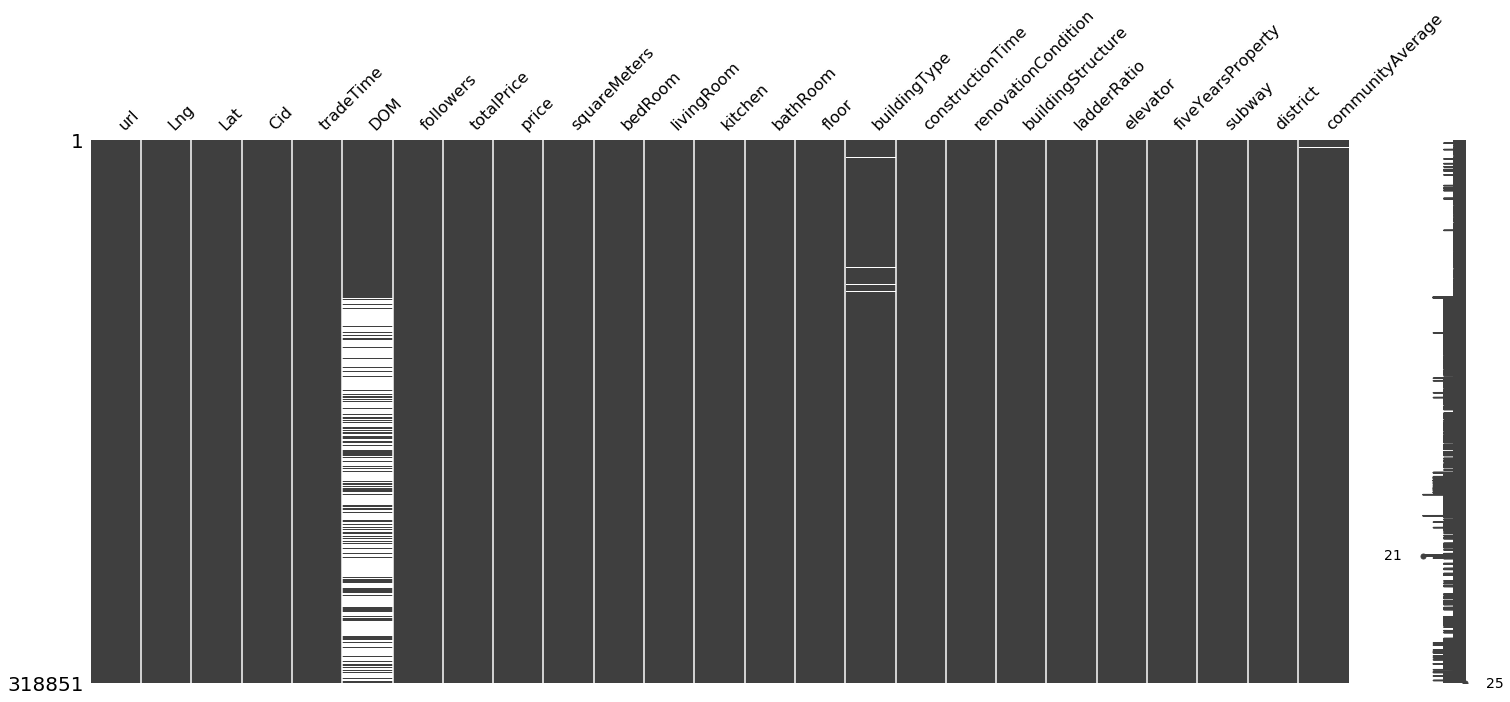

In [13]:
msno.matrix(df) 

 Notice that a large portion of values in DOM column is missing. 

<a id=’Cleaning-Data’></a>
### Cleaning Data


<a id=’Numerical-Variables’></a>
#### Numerical Variables

- Numbers of bedRoom, livingRoom and bathRoom should be integers, but show as objects

In [14]:
#check bedRoom values
print(df.bedRoom.unique())

[2 3 1 4 5 6 9 0 7 8 '1' '4' '3' '2' '5' '7' '9' '6' '0' '#NAME?' '8']


In [15]:
#Check number line with missing values in bedRoom
df[df.bedRoom == '#NAME?'].bedRoom.count()

32

In [16]:
#only 32 lines missing values in bedRoom. I will just remove these lines
#drop missing values and store as integer dtype
df = df.drop(df[df.bedRoom == '#NAME?'].index)
df.bedRoom = df.bedRoom.astype(int)

In [17]:
#check livingRoom values
print(df.livingRoom.unique())

[1 2 0 4 3 5 '0' '1' '2' '3' '4' '5']


In [18]:
#Convert livingRoom number as integer dtype
df.livingRoom = df.livingRoom.astype(int)

In [19]:
#check bathRoom values
print(df.bathRoom.unique())

[1 2 3 0 4 5 6 7 '1' '2' '0' '3' '4' '5' '7']


In [20]:
#Convert bathRoom number as integer dtype
df.bathRoom = df.bathRoom.astype(int)

- Missing Values: communityAverage, DOM, constructionTime

In [21]:
#Check number of missing values in CommunityAverage
sum(df.communityAverage.isna())

463

In [22]:
#there are 463 NaN values. I will just remove these lines
df = df.drop(df[df.communityAverage.isna()].index)

In [23]:
#check distribution on DOM
df.DOM.describe()
#DOM is very skewed

count   160632.000
mean        28.838
std         50.247
min          1.000
25%          1.000
50%          7.000
75%         37.000
max       1677.000
Name: DOM, dtype: float64

Notice that the distribution of DOM is skewed. Because the Days on Markets(DOM) can vary significantly for each year and for each community or district, I will use the median of DOM by year by individual community to fill the missing values first

In [24]:
a = df.loc[:,['Cid', 'tradeTime','DOM']]
a = a.reset_index().set_index('tradeTime')
a['DOM'] = a.groupby([pd.Grouper(freq='Y'), 'Cid']).transform(lambda x: x.fillna(x.median()))
a=a.reset_index().set_index('id')
df['DOM'] = a['DOM']
sum(df.DOM.isna())

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

there are still missing values left. It means there are communities do not have DOM records for a particular year.
Next, I will use the median of DOM by year by district to fill the rest missing values

In [ ]:
a = df.loc[:,['district', 'tradeTime','DOM']]
a = a.reset_index().set_index('tradeTime')
a['DOM'] = a.groupby([pd.Grouper(freq='Y'), 'district']).transform(lambda x: x.fillna(x.median()))
a=a.reset_index().set_index('id')
df['DOM'] = a['DOM']
sum(df.DOM.isna())

In [ ]:
#there are still 6 missing values left. It means there are communities do not have DOM records for a particular year.
#I will just drop them
df = df[df['DOM'].notna()]

In [ ]:
#Check values in constructionTime
print(df.constructionTime.unique())
len(df[df.constructionTime=='未知'])

In [ ]:
#'未知' means unknown. 19114 lines with unknown cusntructionTime. I will simply remove them
df = df.drop(df[df.constructionTime == '未知'].index)

In [ ]:
#convert cunstructionTime to datetime dtype
df.constructionTime = pd.to_datetime(df.constructionTime,format='%Y')

In [ ]:
#Convert tradetime from string to datetime data
df.tradeTime = pd.to_datetime(df.tradeTime)

<a id=’Categorical Variables’></a>
#### Categorical Variables

- Missing Values: buildingType

In [ ]:
# Missing values in buildingType can just be dropped since there are not many. 
# For practice purpose, I will fill in missing values for communities that just has one buildingType 
print(df.buildingType.unique())
len(df[df.buildingType.isna()])

In [ ]:
#Figure out the communities that only has 1 building Type - excluding missing values
a = df.loc[df.buildingType.notna()]
a = a.groupby(['Cid','buildingType']).size().sort_values()
a = a.reset_index().groupby('Cid')['buildingType'].size()
Cid_one_buildingType = list(a[a==1].index)
len(Cid_one_buildingType)
#2459 communities that just have 1 building type.

In [ ]:
a = df[df.Cid.isin(Cid_one_buildingType)]
ms_buildingType = a[a.buildingType.isna()]
len(ms_buildingType)
#568 missing values of buildigType are in communities that only have 1 buildingType.

In [ ]:
len(df[df.buildingType.isna() & ~ df.Cid.isin(Cid_one_buildingType)])
#972 lines needs to be removed. becuase these houses are in communities with more than 1 building type

In [ ]:
#drop those 972 lines then fill missing values in buidingTypes for communities that just has 1 buildingType
df = df.drop(df[df.buildingType.isna() & ~ df.Cid.isin(Cid_one_buildingType)].index)
df = df.sort_values(by=['Cid','buildingType'])
df.buildingType.fillna(method='ffill',inplace=True)

- floor: this column shows the the relative floor position in the building(high, middle, low) and the total floor number of the building. I will split them into separate variables

In [ ]:
print(df.floor)

In [ ]:
df[['floorPosition', 'buildingFloors']]= df.floor.str.split(pat= ' ', expand =True)
df.drop('floor',axis=1,inplace=True)

In [ ]:
print(df.floorPosition.unique())
print(df.buildingFloors.unique())

In [ ]:
len(df[df.floorPosition == '未知'])
# '未知' means unknown. 989 lines with floor position unknow. I will simply remove these lines

In [ ]:
#drop unknown values and convert buildingFloorst as interger
df = df.drop(df[df.floorPosition == '未知'].index)
df.buildingFloors = df.buildingFloors.astype(int)

In [ ]:
#Reassign labels for floorPosition
df.floorPosition = df.floorPosition.apply(
    lambda x: 'middle' if x == '中' 
    else ('high' if x == '高' 
          else ('low' if x =='低' 
                else ('bottom' if x == '底' 
                      else ('top' if x == '顶' else x)))))
df.floorPosition = df.floorPosition.astype(str)

- Label creation for buildingType, renovationCondition, buildingStructure, district

In [ ]:
df.buildingType = df.buildingType.apply(
    lambda x: 'tower' if x == 1 
    else ('bungalow' if x == 2 
          else ('combination' if x == 3 
                else ('plate' if x == 4
                      else x))))

df.renovationCondition = df.renovationCondition.apply(
    lambda x: 'other' if x == 1 
    else ('rough' if x == 2 
          else ('simplicity' if x == 3 
                else ('hardcover' if x == 4
                      else x))))

df.buildingStructure = df.buildingStructure.apply(
    lambda x: 'unknown' if x == 1 
    else ('mixed' if x == 2 
          else ('brick and wood' if x == 3 
                else ('brick and concrete' if x == 4
                      else ('steel' if x == 5
                           else ('steel-concrete composite' if x ==6
                                else x))))))

df.district = df.district.apply(
    lambda x: 'DongCheng' if x == 1 
    else ('FengTai' if x == 2 
          else ('YiZhuang BDA' if x == 3 
                else ('DaXing' if x == 4
                      else ('FangShan' if x == 5
                           else ('ChangPing' if x ==6
                                else ('ChaoYang' if x == 7
                                     else ('HaiDian' if x == 8
                                          else ('Shijingshan' if x == 9
                                               else ('XiCheng' if x == 10
                                                    else ('TongZhou' if x == 11
                                                         else ('Shunyi' if x ==12
                                                              else('MenTouGou' if x ==13
                                                                  else x)))))))))))))






In [ ]:
df.info()

- Converting to categorical data: elevator, fiveYearsProperty, subway, floor

In [ ]:
df.elevator = df.elevator.astype('category')
df.fiveYearsProperty = df.fiveYearsProperty.astype('category')
df.subway = df.subway.astype('category')
df.floorPosition = df.floorPosition.astype('category')
df.renovationCondition = df.renovationCondition.astype('category')
df.buildingStructure = df.buildingStructure.astype('category')
df.district = df.district.astype('category')
df.buildingType = df.buildingType.astype('category')

In [ ]:
df.info()

<a id=’Outliers’></a>
#### Outliers
- Price and ladderRatio

In [ ]:
df.describe()
# notice that the ladderRatio has a max value of 10009400 which is extremly high
# Also entries that have min totalPrice of 0.1 must be outliers

Notice that the ladderRatio has a max value of 10009400 which is extremly high and seems abnormal. Also lines that have min totalPrice of 0.1 seems incorrect as well.

In [ ]:
print(df.sort_values(by = 'ladderRatio', ascending=False)['ladderRatio'].head(5))
# there are only two entries with ladderRatio of 10009400. I will just remove these two entries

df = df.drop(df[df.ladderRatio == df.ladderRatio.max()].index)

To see which entries have incorrect totalPrice values, I will firstly calculate the total price based on Price per sq. meters and the number of sq. meters of the house. 
If the ratio of the totalPrice column and the calculated total Price is not equal to 1, the entry is a possibly outlier with incorrect price info

In [ ]:
df['totalPrice_calculated'] = df.price * df.squareMeters / 10000
len(df[round(df.totalPrice / df.totalPrice_calculated)!=1])

In [ ]:
#there are 209 lines with incorrect price info. Remove these lines
df = df.drop(df[round(df.totalPrice / df.totalPrice_calculated)!=1].index)
df.drop('totalPrice_calculated', axis = 1, inplace=True)

In [ ]:
df.describe()

<a id=’Summary’></a>
### Summary
After cleaning the data and removing the outliers, now we have 297084 lines that are ready to use to build our model. 


